In [1]:
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [8]:
titanic_data = pd.read_csv("C:/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print('Data shape...')
print(titanic_data.shape)

Data shape...
(891, 12)


In [10]:
titanic_data = titanic_data.drop(['Ticket','Cabin'], axis=1)
titanic_data = titanic_data.dropna()

Text(0.5,1,'Passengers per boarding location')

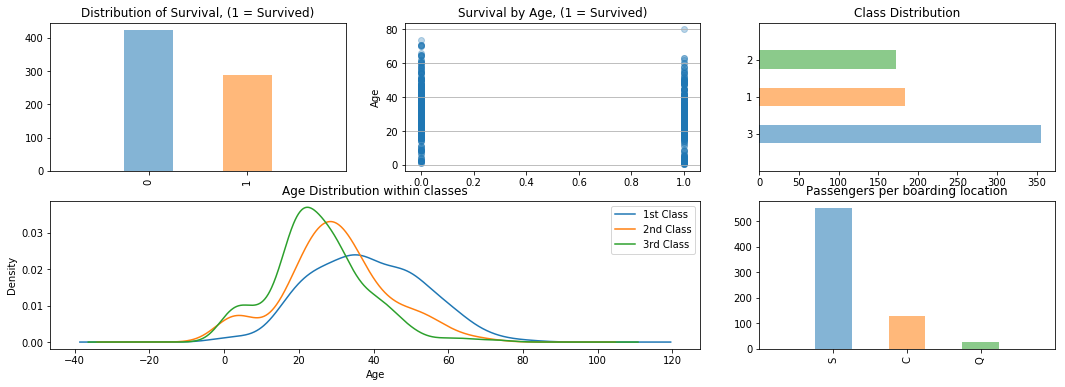

In [11]:
fig = plt.figure(figsize=(18,6))
alpha=alpha_scatterplot = 0.3
alpha_bar_chart = 0.55

# Defining a grid of subplots to contain all the figures
ax1 = plt.subplot2grid((2,3),(0,0))

# Add the first bar plot which represents the count of people who survived vs not survived.
titanic_data.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)

# Adding margins to the plot
ax1.set_xlim(-1, 2)

# Adding bar plot title
plt.title("Distribution of Survival, (1 = Survived)")
plt.subplot2grid((2,3),(0,1))
plt.scatter(titanic_data.Survived, titanic_data.Age, alpha=alpha_scatterplot)

# Setting the value of the y label (age)
plt.ylabel("Age")

# formatting the grid
plt.grid(b=True, which='major', axis='y')
plt.title("Survival by Age, (1 = Survived)")
ax3 = plt.subplot2grid((2,3),(0,2))
titanic_data.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(titanic_data.Pclass.value_counts()))
plt.title("Class Distribution")
plt.subplot2grid((2,3),(1,0), colspan=2)

# plotting kernel density estimate of the subse of the 1st class passenger’s age
titanic_data.Age[titanic_data.Pclass == 1].plot(kind='kde')
titanic_data.Age[titanic_data.Pclass == 2].plot(kind='kde')
titanic_data.Age[titanic_data.Pclass == 3].plot(kind='kde')

# Adding x label (age) to the plot
plt.xlabel("Age")
plt.title("Age Distribution within classes")

# Add legend to the plot.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')
ax5 = plt.subplot2grid((2,3),(1,2))
titanic_data.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(titanic_data.Embarked.value_counts()))
plt.title("Passengers per boarding location")

Text(0.5,1,'Breakdown of survivals(0 = Died, 1 = Survived)')

<Figure size 432x288 with 0 Axes>

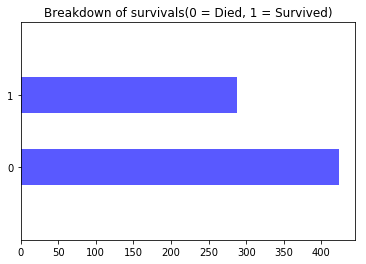

In [12]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
titanic_data.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(titanic_data.Survived.value_counts()))
plt.title("Breakdown of survivals(0 = Died, 1 = Survived)")

(-1, 2)

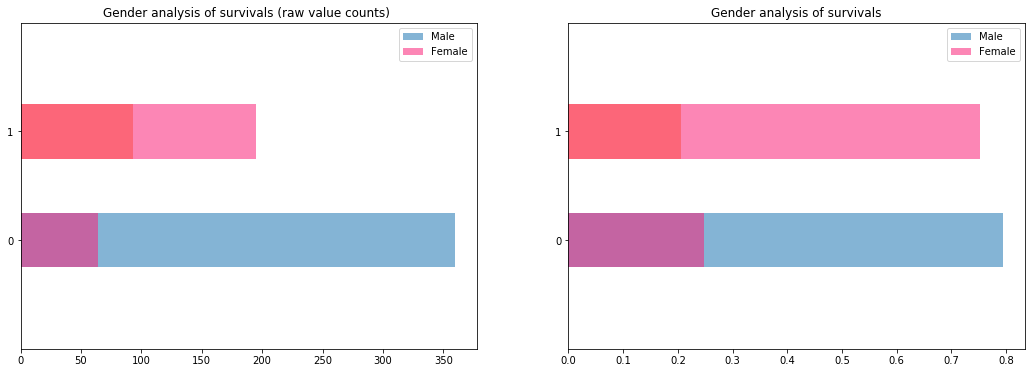

In [13]:
fig = plt.figure(figsize=(18,6))
#Plotting gender based analysis for the survivals.
male = titanic_data.Survived[titanic_data.Sex == 'male'].value_counts().sort_index()
female = titanic_data.Survived[titanic_data.Sex == 'female'].value_counts().sort_index()
ax1 = fig.add_subplot(121)
male.plot(kind='barh',label='Male', alpha=0.55)
female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Gender analysis of survivals (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2)
ax2 = fig.add_subplot(122)
(male/float(male.sum())).plot(kind='barh',label='Male', alpha=0.55)
(female/float(female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Gender analysis of survivals"); plt.legend(loc='best')
ax2.set_ylim(-1, 2)

In [14]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)'
# create a results dictionary to hold our regression results for easy analysis later
results = {}
# create a regression friendly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=titanic_data, return_type='dataframe')
# instantiate our model
model = sm.Logit(y,x)
# fit our model to the training data
res = model.fit()
# save the result for outputing predictions later
results['Logit'] = [res, formula]
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Dec 2018   Pseudo R-squ.:                  0.3414
Time:                        18:49:25   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.992e-67
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000       3.613       5.471
C(Pclass)[T

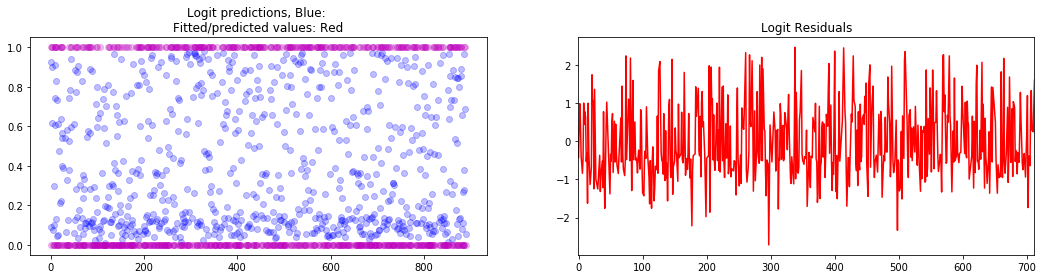

In [15]:
# Plot Predictions Vs Actual
plt.figure(figsize=(18,4));
plt.subplot(121)
# generate predictions from our fitted model
ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');
# Residuals
ax2 = plt.subplot(122)
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');